<a href="https://colab.research.google.com/github/ravivarmakumar/INFO-5505-Spring-2022/blob/main/RaviVarmaKumarBevara_INFO5505_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INFO-5505 Applied Machine Learning for Data Scientists


### Assignment 4 - Random Forest


- Name: Ravi Varma Kumar Bevara
- Student ID : 11476678

**Ensemble Learning**
<font color='red'>
> All the fundemental algorithms that we have performed in earlier assignments hvae their limitaions because of thier simplicity. In practice, deep neural networks require significant amount f data which we might not have. So, another approach to boost the performance of simple learning algorithms is ensemble learning.
<br />
</font>


Ensemble learning is a learning paradigm that, instead of trying to learn on one super-accurate model, focuses on training large number of low-accuracy models and then combining the predictions given by those weak models to obtain a high-accuracy meta-model.

Th weak learner, which is used for Randon forest is 'Decision Tree' which is trained by splitting the training set after just few iterations.


* Random Forest - It is a type og bagging that uses a modifies tree learning algorithm that inspects, at each split in the learning process, a randon subset of the features.

  - It is so effective because it using multiple samples of the original dataset, so thereby reducing the variance.
  - Low variance mean low overfitting.
  - If the training set was samples, sometimes it may include the unavoidable artifacts such as noise, outliers etc.
  - But, by creating multiple random samples with replacement of our training set, we reduce the effect of these artifacts.



#### Importing Libraries

#
<font color="blue">
As the python is the primary language I chose to execute this model, I tried to explore all the libraries related to exploratory data analysis. Numpy is the module we use for mathematical analysis related to dataset such as getting null values, changing the shape of input array to the model. Pandas being the best model for data manipulation, which is highly compactable with NumPy module. For supporting the data analysis, I choose the two popular libraries matplotlib, and seaborn for appropriate visualizations.
</font>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

For the dataset, I decided to save the data on the cloud which is google drive, It would be compactable with google cloab

####Mounting my google drive for the dataset access

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
rawdata = pd.read_csv('drive/MyDrive/INFO5505-Spring2022/data-breastCancer.csv')

####Exploratory Data Analysis

<font color='seagreen'>

* It is exploring the data to better understand the data, like extraxting or transforming input variabeles.
* Indetifyiing outliers, missing values, and human errors in the data.
* Understanding the relation between each variable, alongside observing how each variables is distributed along thhe path of data provided.
</font>

In [ ]:
rawdata.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
rawdata.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
rawdata.shape

(569, 33)

In [ ]:
rawdata.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
rawdata.isnull()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
rawdata.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

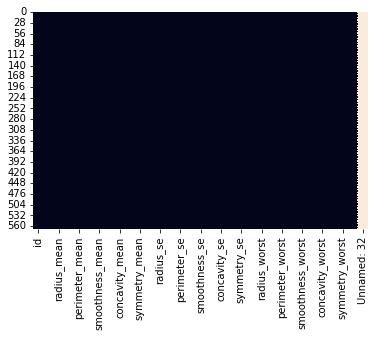

In [ ]:
sns.heatmap(rawdata.isnull(), cbar=False)

In [ ]:
rawdata.drop(columns=['Unnamed: 32','id'], axis=1, inplace=True)

In [ ]:
rawdata.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
rawdata.shape

(569, 31)

In [ ]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

#### Encoding the Target Variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
rawdata['diagnosis'] = le.fit_transform(rawdata['diagnosis'])

In [ ]:
from collections import Counter
Counter(rawdata['diagnosis'])

Counter({0: 357, 1: 212})

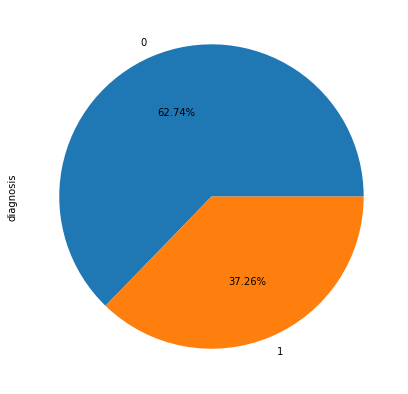

In [ ]:
plt.figure(1, figsize=(15,7))
rawdata['diagnosis'].value_counts().plot.pie(autopct="%.2f%%")

In [ ]:
rawdata.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


####Correlation Matrix

#
<font color="red">
For exploring how the attributes of dataset are behaving among themselves, with each other attributes, I used correaltion matrix concept from statistics which will result me all the correaltion coefficients. In detail, it is a table which shows the correaltion between varibales.
</font>

In [ ]:
rawdata.corr ()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


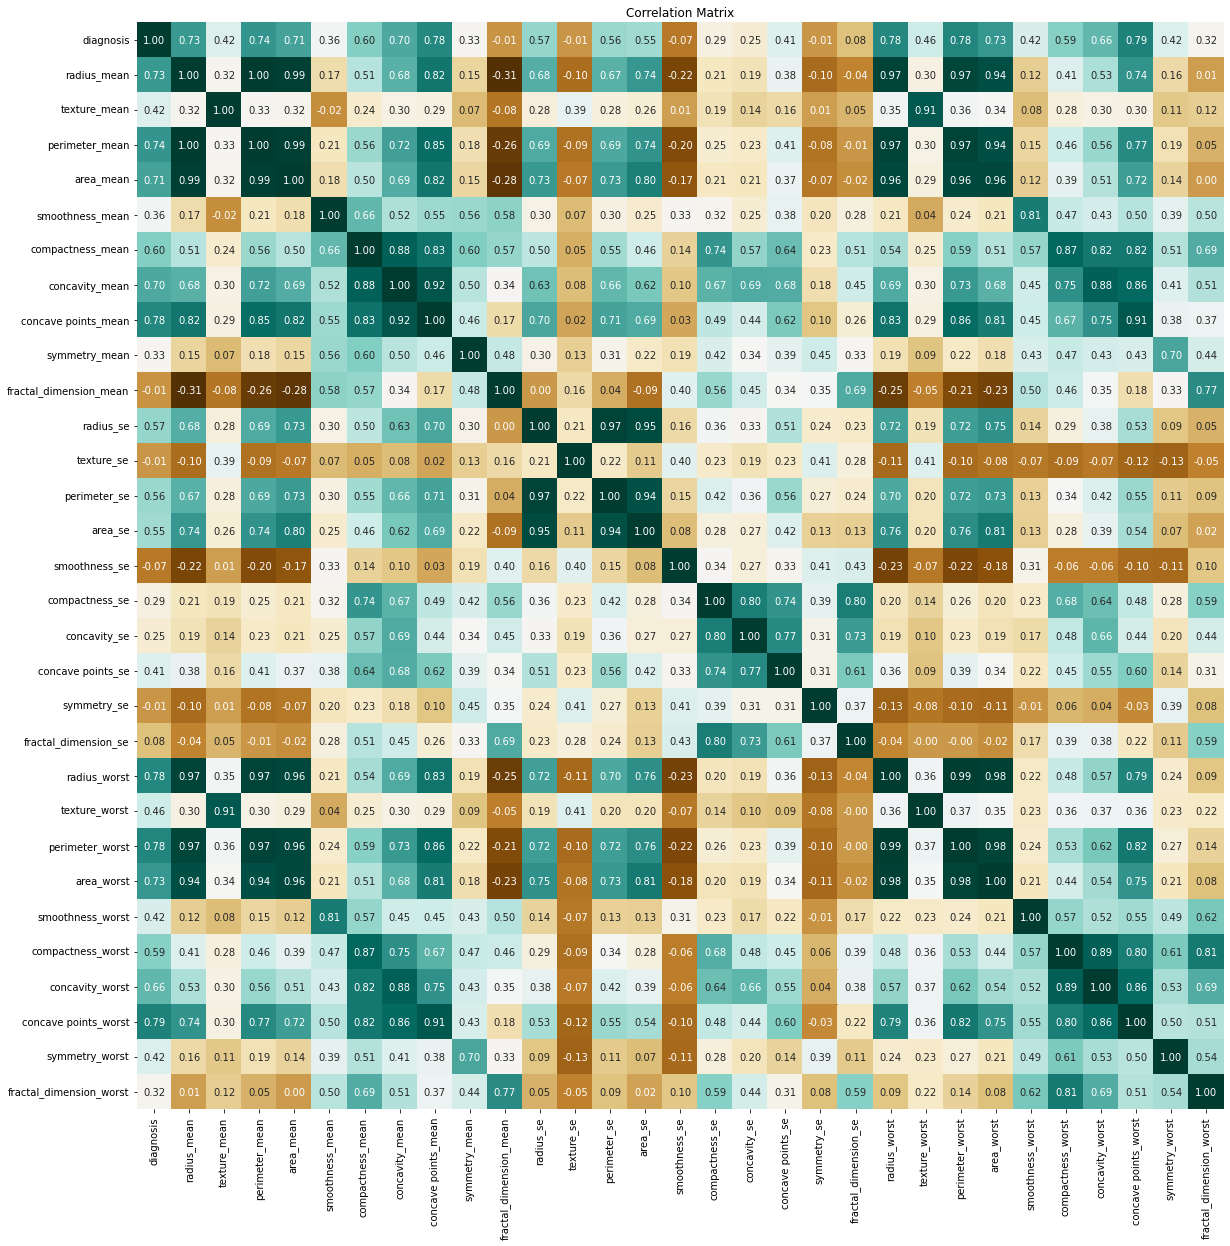

In [ ]:
plt.figure(figsize=(20,20))
heatmap = sns.heatmap(rawdata.corr(), cbar=False, fmt='.2f', annot=True, square=True, cmap='BrBG')
plt.title('Correlation Matrix')
plt.show()

#
<font color="blue">
After examining the correaltion matrix, I decided to plot the data in steps of each variable vs the other variables of the dataset.

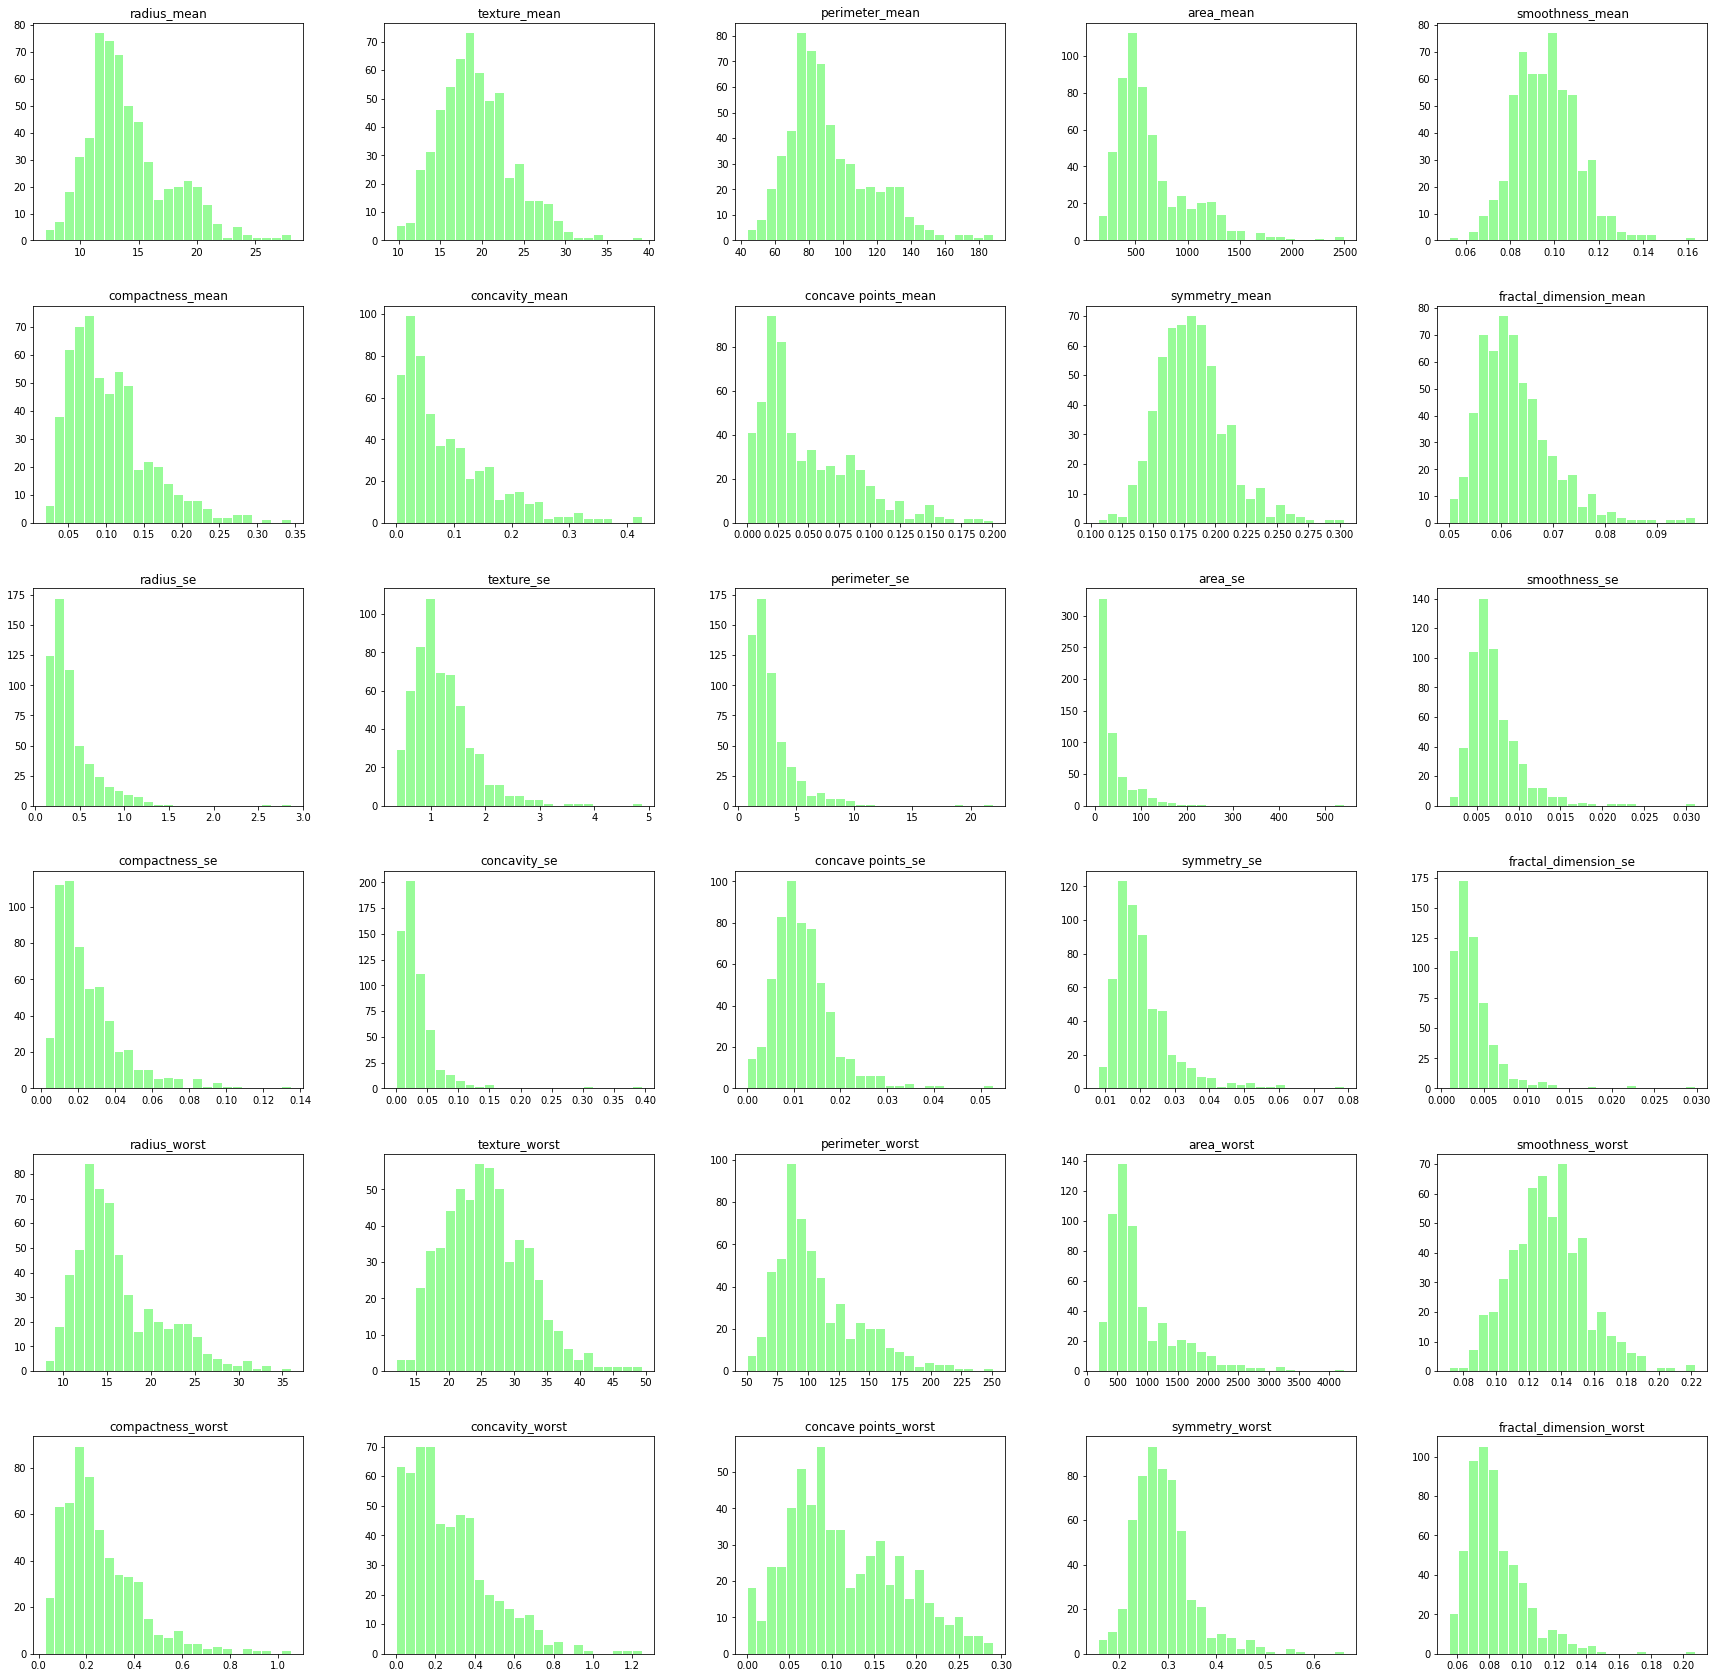

In [ ]:
distributiontraindata =  rawdata.loc[:, rawdata.columns != 'diagnosis'].hist(figsize=(30,30),bins=25, grid=False, rwidth = 0.9, color="palegreen")

In [ ]:
rawdata.agg(['skew', 'kurtosis'])

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
skew,0.528461,0.942380,0.650450,0.990650,1.645732,0.456324,1.190123,1.401180,1.171180,0.725609,...,1.103115,0.498321,1.128164,1.859373,0.415426,1.473555,1.150237,0.492616,1.433928,1.662579
kurtosis,-1.726811,0.845522,0.758319,0.972214,3.652303,0.855975,1.650130,1.998638,1.066556,1.287933,...,0.944090,0.224302,1.070150,4.396395,0.517825,3.039288,1.615253,-0.535535,4.444560,5.244611


#
<font color="blue">
As Random Forest is a decision tree, it can handle the artifacts such as noise, non normal distributions in the data etc. But, from the correlation matrix, I could see there are strong correaltions between many variables. So, I sense some multicolinearlity, so let's check the that...

In [ ]:
mean_cols = [col for col in rawdata.columns if '_mean' in col]
se_cols = [col for col in rawdata.columns if '_se' in col]
worst_cols = [col for col in rawdata.columns if '_worst' in col]

In [ ]:
mean_cols.append('diagnosis')

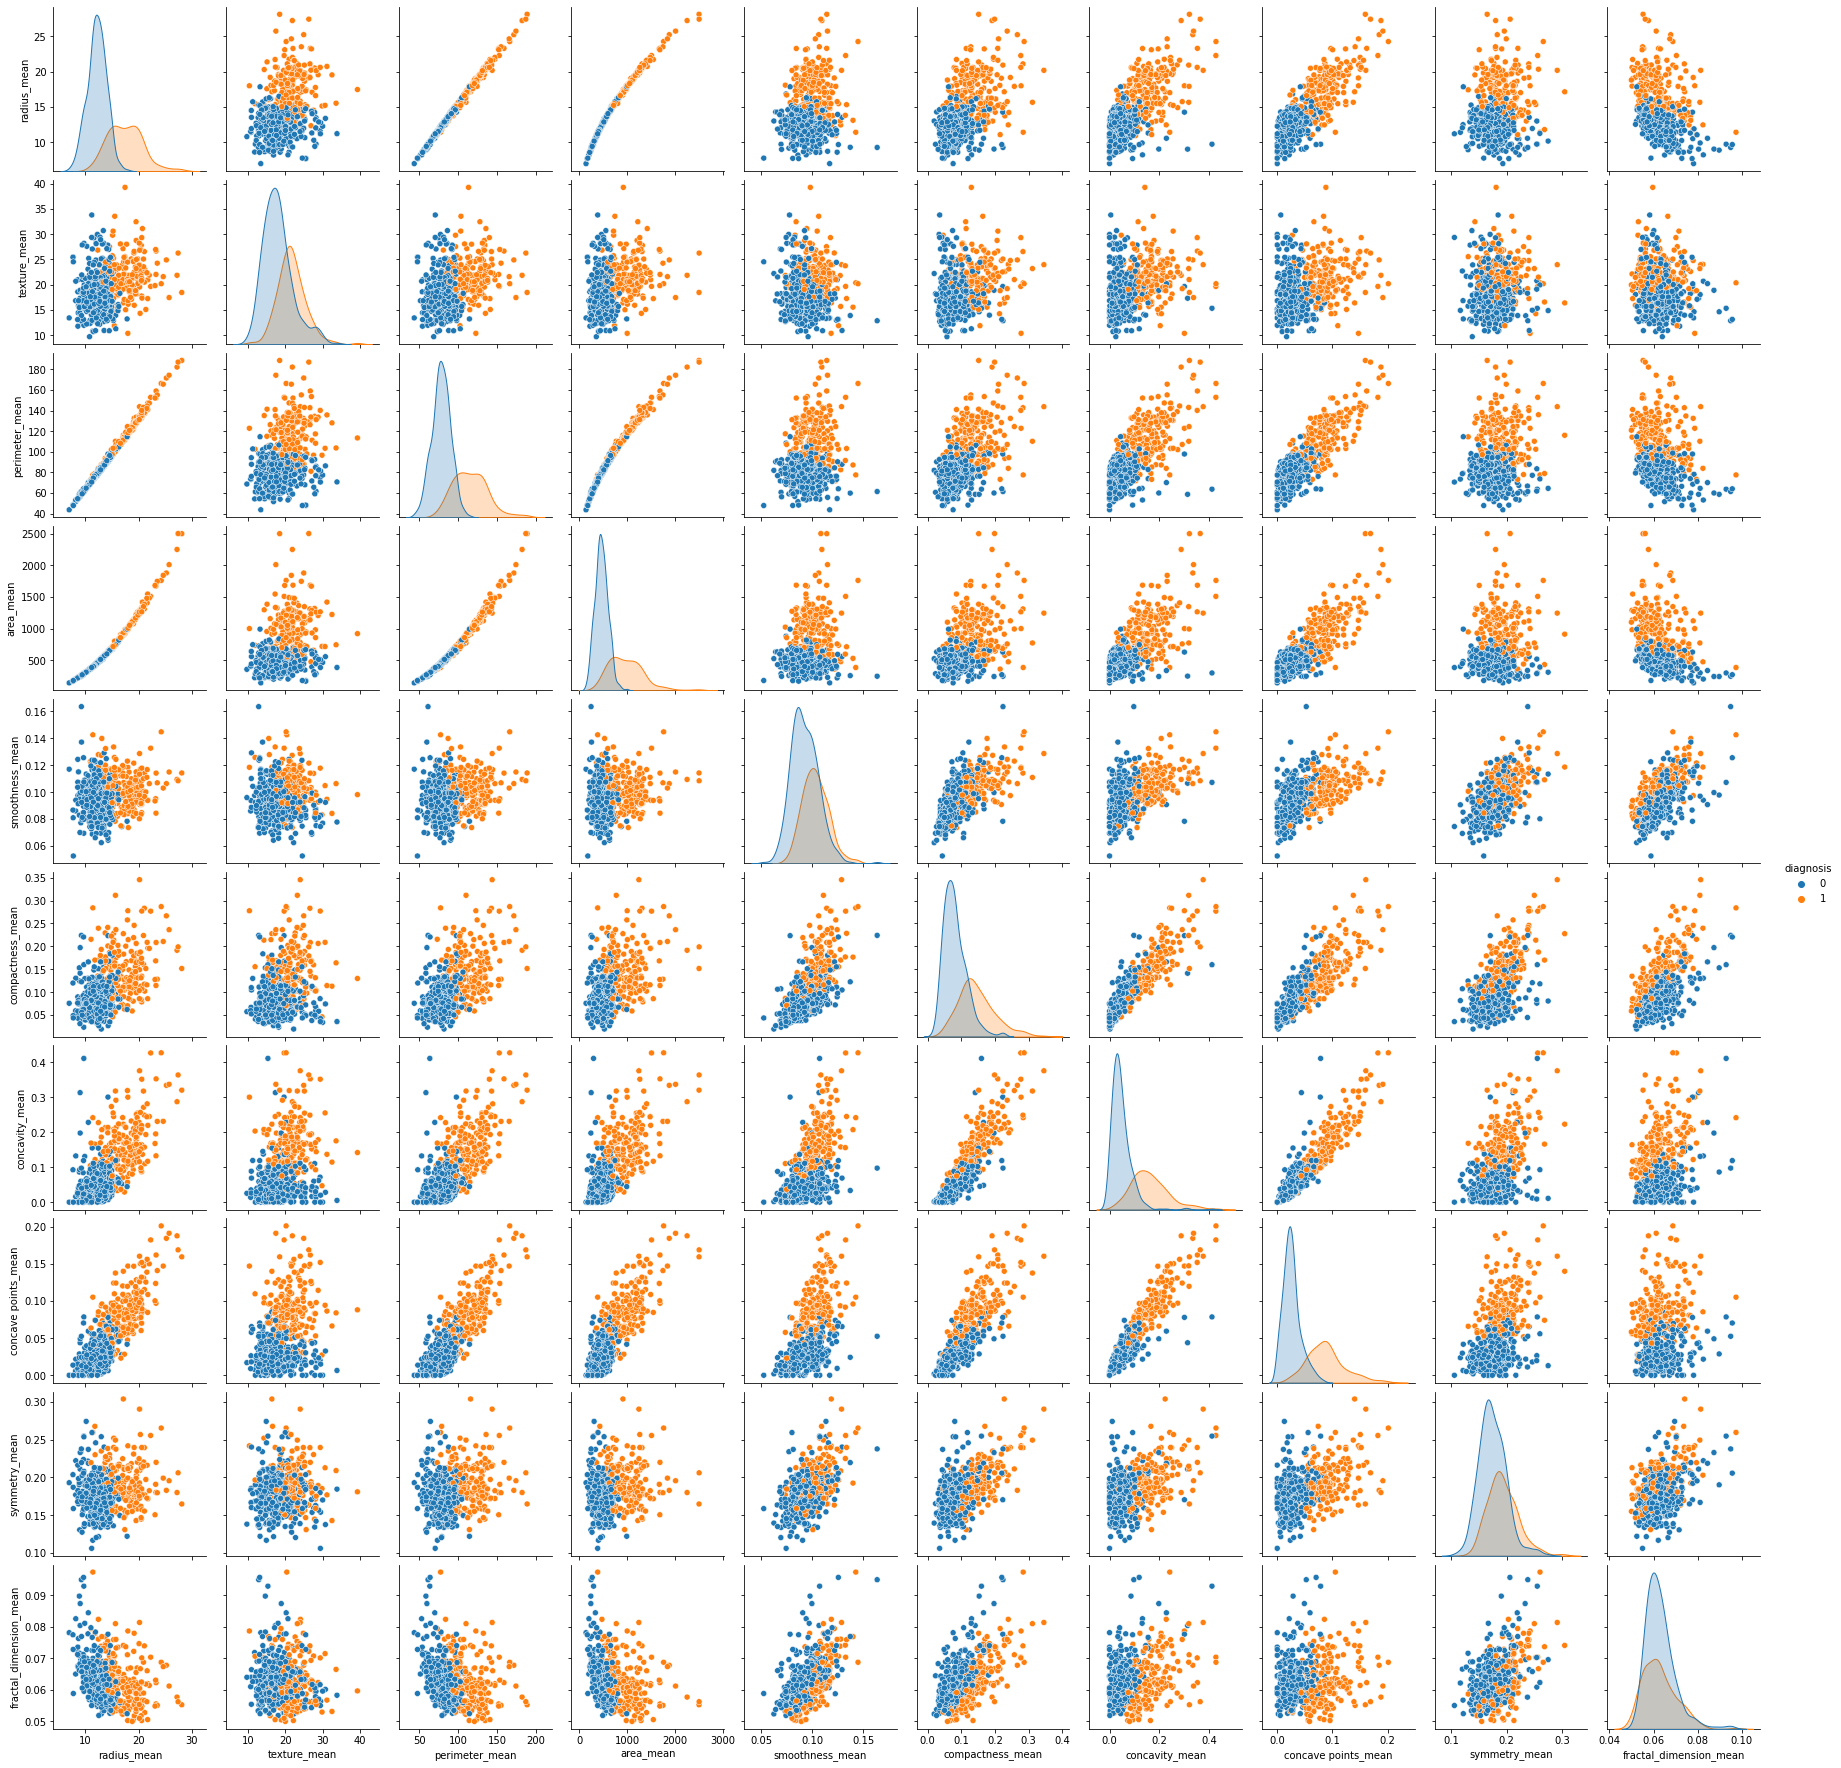

In [ ]:
sns.pairplot(rawdata[mean_cols],hue='diagnosis')

#
<font color="blue">
The above picture summarizes the strong linear relationship between radius, area, and perimeter means which makes obvious sense as they are depend on the radius. Also, for checking the other features relation lets use the masked correlation matrix.

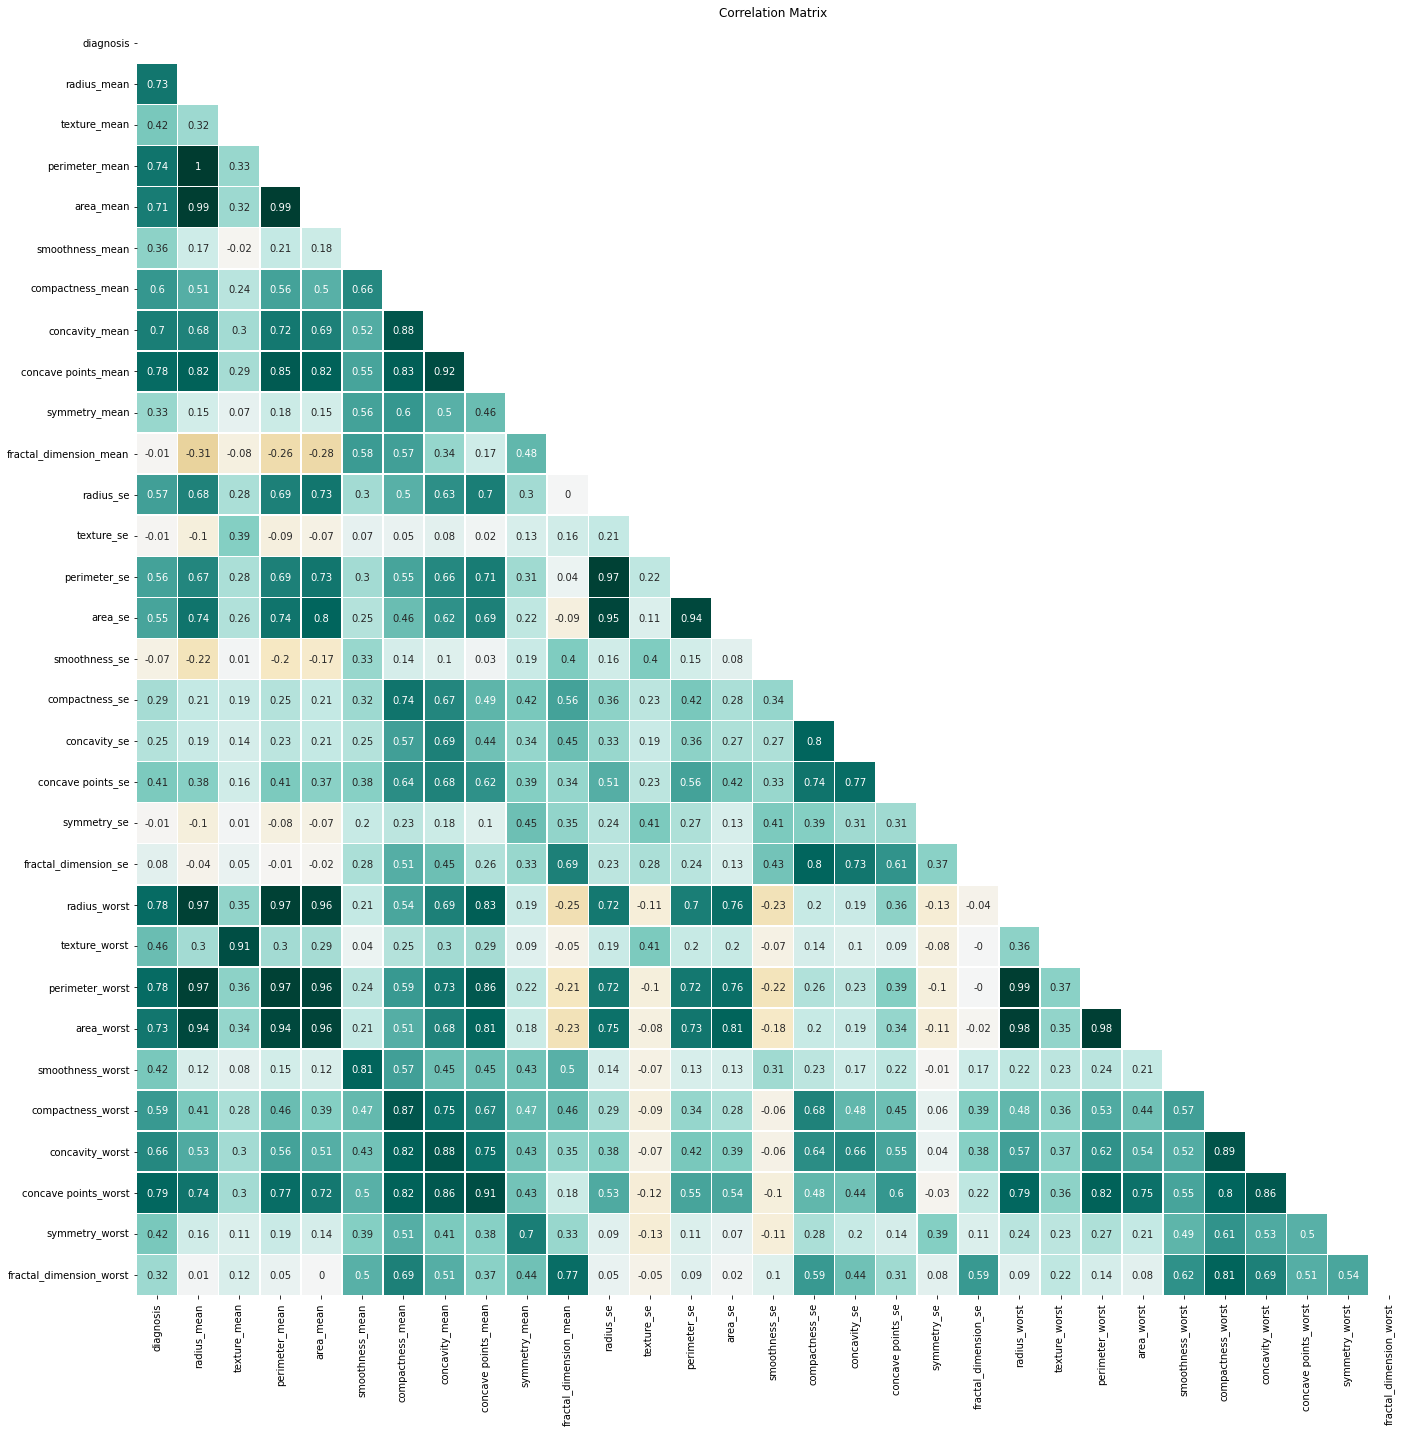

In [ ]:
corr = rawdata.corr().round(2)

mask = np.zeros_like(corr,dtype=bool)
mask[np.triu_indices_from(mask)] = True

f,ax = plt.subplots(figsize = (20,20))
sns.heatmap(corr, mask=mask, cbar=False, vmin=-1, vmax=1, linewidth = .5, annot=True, square=True, cmap='BrBG')
ax.set_title('Correlation Matrix')
plt.tight_layout()

#
<font color="blue">
From the matrix, we can form a list of columns that are strongly correlated with other columns. So, we can remove them so that we will be able to resolve multicolinearity problem.

In [ ]:
cleandata = rawdata.drop(worst_cols,axis=1)

extra_cols = ['area_mean','area_se','perimeter_mean','perimeter_se','concavity_mean','concavity_se','concave points_mean','concave points_se']
cleandata = cleandata.drop(extra_cols,axis=1)

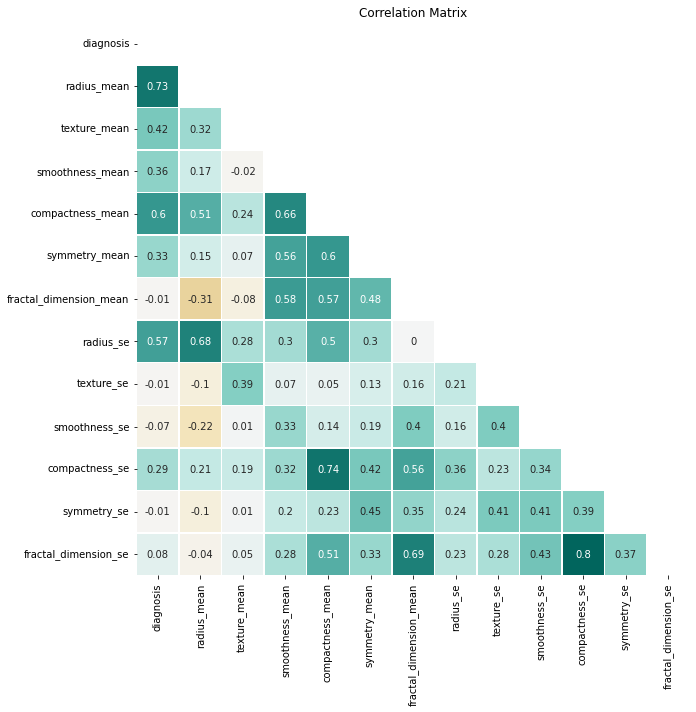

In [ ]:
corr = cleandata.corr().round(2)

mask = np.zeros_like(corr,dtype=bool)
mask[np.triu_indices_from(mask)] = True

f,ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr, mask=mask, cbar=False, vmin=-1, vmax=1, linewidth = .5, annot=True, square=True, cmap='BrBG')
ax.set_title('Correlation Matrix')
plt.tight_layout()

In [ ]:
cleandata

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
0,1,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.006193
1,1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.003532
2,1,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.004571
3,1,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.009208
4,1,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.005115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.01114,0.004239
565,1,20.13,28.25,0.09780,0.10340,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.01898,0.002498
566,1,16.60,28.08,0.08455,0.10230,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.01318,0.003892
567,1,20.60,29.33,0.11780,0.27700,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,0.02324,0.006185


In [ ]:
cleandata.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744
radius_se,569.0,0.405172,0.277313,0.111500,0.232400,0.324200,0.478900,2.87300
texture_se,569.0,1.216853,0.551648,0.360200,0.833900,1.108000,1.474000,4.88500
smoothness_se,569.0,0.007041,0.003003,0.001713,0.005169,0.006380,0.008146,0.03113


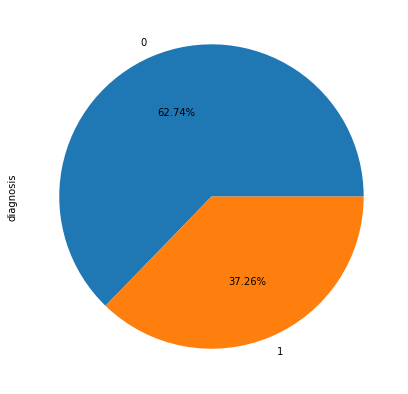

In [ ]:
plt.figure(1, figsize=(15,7))
cleandata['diagnosis'].value_counts().plot.pie(autopct="%.2f%%")

#### Model Training

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
x = cleandata.iloc[:, cleandata.columns != 'diagnosis']
y = cleandata.iloc[:, cleandata.columns == 'diagnosis']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
y_train = y_train.values.ravel() 
y_test = y_test.values.ravel() 

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import sklearn.metrics as metrics

In [ ]:
model = RandomForestClassifier(random_state=42)

model.fit(x_train,y_train)
predictions = model.predict(x_test)
accuracy = metrics.accuracy_score (y_test, predictions)
print("Base Model Accuracy: {:.2f} %".format(accuracy*100))

Base Model Accuracy: 90.35 %


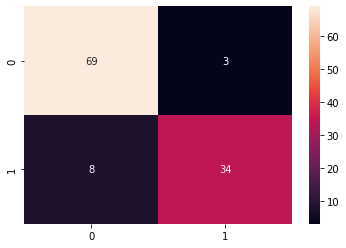

In [ ]:
predictions = model.predict(x_test)
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        72
           1       0.92      0.81      0.86        42

    accuracy                           0.90       114
   macro avg       0.91      0.88      0.89       114
weighted avg       0.90      0.90      0.90       114



#### Hyperparameter Tuning

In [ ]:
parameters = {'max_depth': [2,3,4],
          'bootstrap': [True, False],
          'max_features': ['auto', 'sqrt', 'log2', None],
          'criterion': ['gini', 'entropy']}

optimized_model = GridSearchCV(estimator=model, cv = 10, param_grid=parameters, n_jobs = -1, scoring='recall')

optimized_model.fit(x_train, y_train)
optimizedaccuracy = optimized_model.best_score_
optimizedparameters = optimized_model.best_params_
print("Best Accuracy: {:.2f} %".format(optimizedaccuracy*100))
print("Best Parameters:", optimizedparameters)

Best Accuracy: 87.65 %
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'max_features': None}


In [ ]:
tunedmodel = RandomForestClassifier(n_estimators=100,bootstrap=True,criterion='entropy',max_depth=4,max_features=None)
tunedmodel.fit(x_train,y_train)
tunedpredictions = tunedmodel.predict(x_test)
print ("Fine Tuned Model Accuracy Score : ",metrics.accuracy_score(y_test, tunedpredictions) )
print ("Fine Tuned Model Recall Score (how much of malignant tumours were predicted correctly) : ",metrics.recall_score(y_test, tunedpredictions))
print ("Fine Tuned Model Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'): ",metrics.precision_score(y_test, tunedpredictions))

Fine Tuned Model Accuracy Score :  0.9298245614035088
Fine Tuned Model Recall Score (how much of malignant tumours were predicted correctly) :  0.8809523809523809
Fine Tuned Model Precision Score (how much of tumours, which were predicted as 'malignant', were actually 'malignant'):  0.925


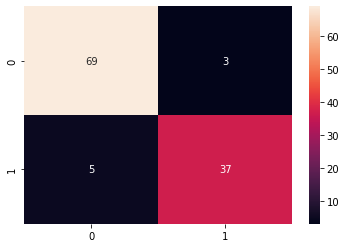

In [ ]:
cm = confusion_matrix(y_test, tunedpredictions)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, tunedpredictions))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        72
           1       0.93      0.88      0.90        42

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



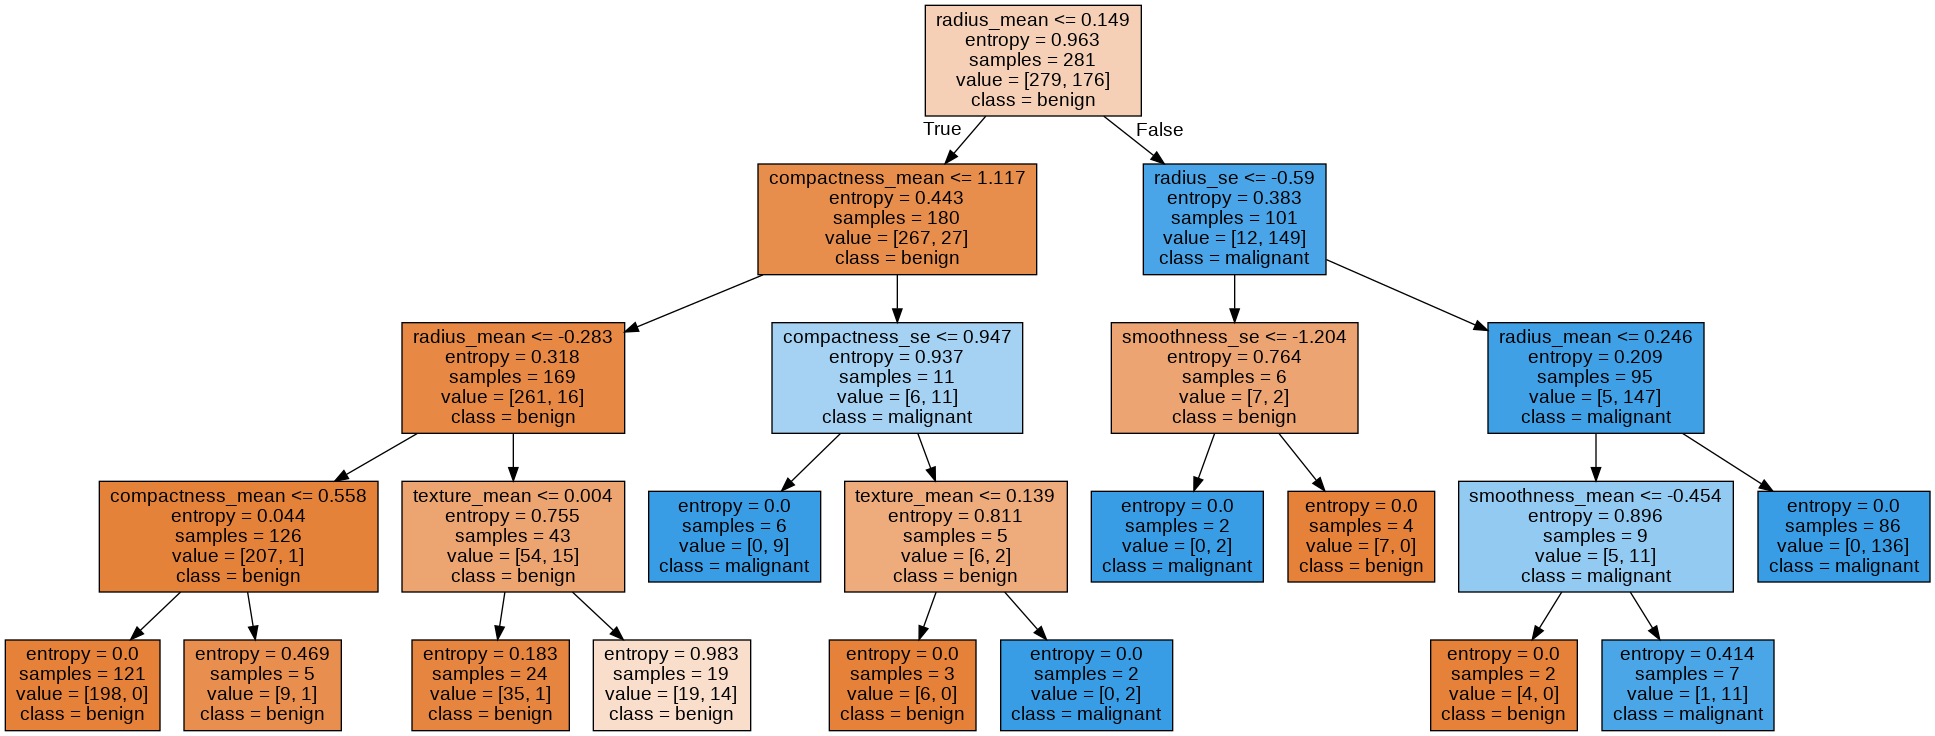

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image

tree_graph = export_graphviz(optimized_model.best_estimator_.estimators_[0], class_names = ['benign', 'malignant'], feature_names = cleandata.drop(['diagnosis'], axis=1).columns, filled=True,out_file='tree.dot')
!dot -Tpng tree.dot -o tree.png
Image(filename='tree.png')

#### Feature Importance

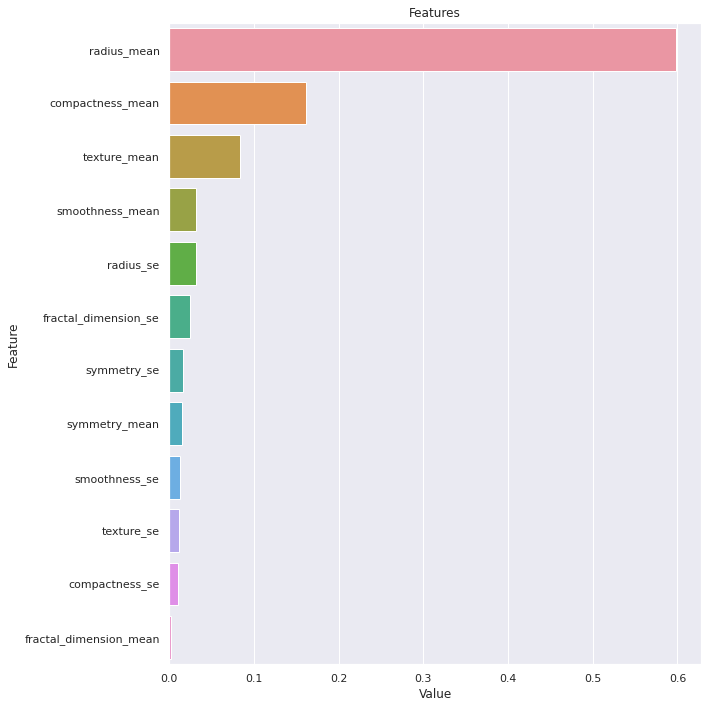

In [ ]:
def plot_importance(model, features, num=len(x), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()

plot_importance(tunedmodel, x, 15)

#### Model Validation using 10-Fold Cross Validation

In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(tunedmodel, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
nfoldpredictions = tunedmodel.predict(x_test)
print("All accuracies for the 10 folds are: \n",scores)
print("Average of all 10 folds of datas is: \n",scores.mean())

All accuracies for the 10 folds are: 
 [0.92982456 0.9122807  0.89473684 0.92982456 0.89473684 0.9122807
 0.96491228 0.96491228 0.96491228 0.92857143]
Average of all 10 folds of datas is: 
 0.9296992481203008


#### Receiver Operating Characteristic curve for Model Training

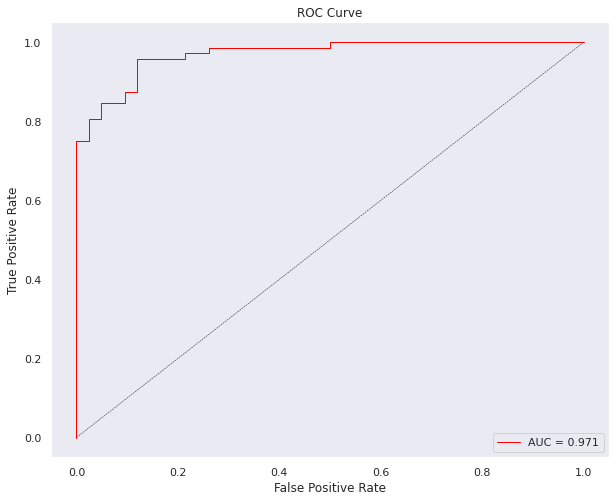

In [ ]:
probas = tunedmodel.predict_proba(x_test)
fpr, tpr, _ = metrics.roc_curve(y_test, probas[:,0], pos_label=0)
roc_auc = metrics.auc(fpr, tpr)

f, ax = plt.subplots(figsize=(10,8))
ax.grid(False)
plt.plot(fpr, tpr, lw=1, color='red', label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1], [0,1], 'k--', lw=0.5)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()